In [1]:
# Create Conditional Generative Adversarial Network (GAN) to generate new images of handwritten digits
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [-1, 1]
train_images = (train_images - 127.5) / 127.5
test_images = (test_images - 127.5) / 127.5

# Reshape the images to (28, 28, 1)
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
sample_size = 100
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2024-02-03 01:23:21.680221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 01:23:24.295256: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/TensorRT-8.4.0.6//lib:/usr/local/cuda-11.6/lib64:/usr/local/apps/python-3.10.2/lib:/usr/local/apps/cuDNN/8.4.0-cuda-11.6/lib
2024-02-03 01:23:24.295421: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.11.0


In [2]:
print("HELsaP")

HELsaP


In [6]:
# Create Generator model which uses conditional input

label = tf.keras.layers.Input(shape=(1))
embed = tf.keras.layers.Embedding(10, 50)(label)
embed = tf.keras.layers.Flatten()(embed)
# dense = tf.keras.layers.Dense(7 * 7)(embed)
# reshape = tf.keras.layers.Reshape((7, 7, 1))(dense)

latent_input = tf.keras.layers.Input(shape=(100,))
x = tf.keras.layers.Dense(5000)(latent_input)
# x2 = tf.compat.v1.keras.layers.BatchNormalization()(x)
x3 = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
# x4 = tf.keras.layers.Reshape((7, 7, 256))(x3)

comb  = tf.keras.layers.Concatenate()([x3, embed])

# x5 = tf.keras.layers.Dense(14 * 14 * 64)(comb)
# x6 = tf.compat.v1.keras.layers.BatchNormalization()(x5)
# x7 = tf.keras.layers.LeakyReLU(alpha=0.2)(x6)

x8 = tf.keras.layers.Dense(3000)(comb)
# x9 = tf.compat.v1.keras.layers.BatchNormalization()(x8)
x10 = tf.keras.layers.LeakyReLU(alpha=0.2)(x8)


out = tf.keras.layers.Dense(28 * 28, activation='tanh')(x10)
out = tf.keras.layers.Reshape((28, 28, 1))(out)


# out = tf.keras.layers.Conv2DTranspose(1, (7, 7), activation='tanh', padding='same')(x10)

generator = tf.keras.models.Model([latent_input, label], out)
generator.summary()

tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 5000)         505000      ['input_8[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        500         ['input_7[0][0]']                
                                                                                            

In [7]:
# Create Discriminator model which uses conditional input

label = tf.keras.layers.Input(shape=(1,))
embed = tf.keras.layers.Embedding(10, 50)(label)
embed = tf.keras.layers.Flatten()(embed)

image_input = tf.keras.layers.Input(shape=(28, 28, 1))
image_input2 = tf.keras.layers.Flatten()(image_input)
comb = tf.keras.layers.Concatenate()([image_input2, embed])



x0 = tf.keras.layers.Dense(2000)(comb)
# x1  = tf.compat.v1.keras.layers.BatchNormalization()(x0)
x2 = tf.keras.layers.LeakyReLU(alpha=0.2)(x0)

x4 = tf.keras.layers.Dense(1000)(x2)
# x5 = tf.compat.v1.keras.layers.BatchNormalization()(x4)
x6 = tf.keras.layers.LeakyReLU(alpha=0.2)(x4)

x4 = tf.keras.layers.Dense(100)(x6)
# x5 = tf.compat.v1.keras.layers.BatchNormalization()(x4)
x6 = tf.keras.layers.LeakyReLU(alpha=0.2)(x4)

# x8 = tf.keras.layers.Flatten()(x7)
x9 = tf.keras.layers.Dense(1, activation='sigmoid')(x6)

discriminator = tf.keras.models.Model([image_input, label], x9)
discriminator.summary()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 50)        500         ['input_9[0][0]']                
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_10[0][0]']               
                                                                                            

In [9]:
# Create GAN by combining Generator and Discriminator
latent_input, label = generator.input   
output = discriminator([generator.output, label])
gan = tf.keras.models.Model([latent_input, label], output)
gan.summary()
tf.keras.utils.plot_model(gan, show_shapes=True, dpi=64)

discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 5000)         505000      ['input_8[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        500         ['input_7[0][0]']                
                                                                                            

In [10]:
tf.keras.utils.plot_model(gan, show_shapes=True, dpi=64)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
# discriminator.compiled_metrics._metrics
tf.keras.utils.disable_interactive_logging()
from IPython.display import clear_output

num_iterations = 10
batch_size = 128
smooth = 0.1
total = train_images.shape[0]//batch_size
l1_hist = []
l2_hist = []
l3_hist = []
ac1_hist = []
ac2_hist = []

Iteration: 0


2024-02-03 01:27:43.683573: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55a23d82baa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-03 01:27:43.683632: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-02-03 01:27:43.692669: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-03 01:27:43.816751: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


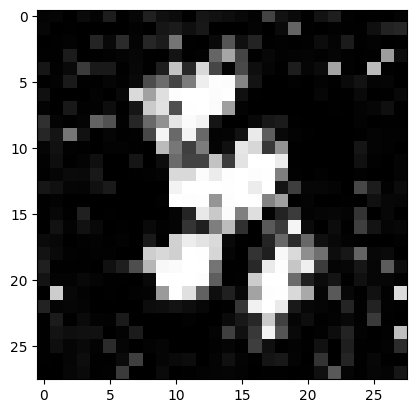

Discriminator prediction: [[0.21966097]] Label: [[0]]


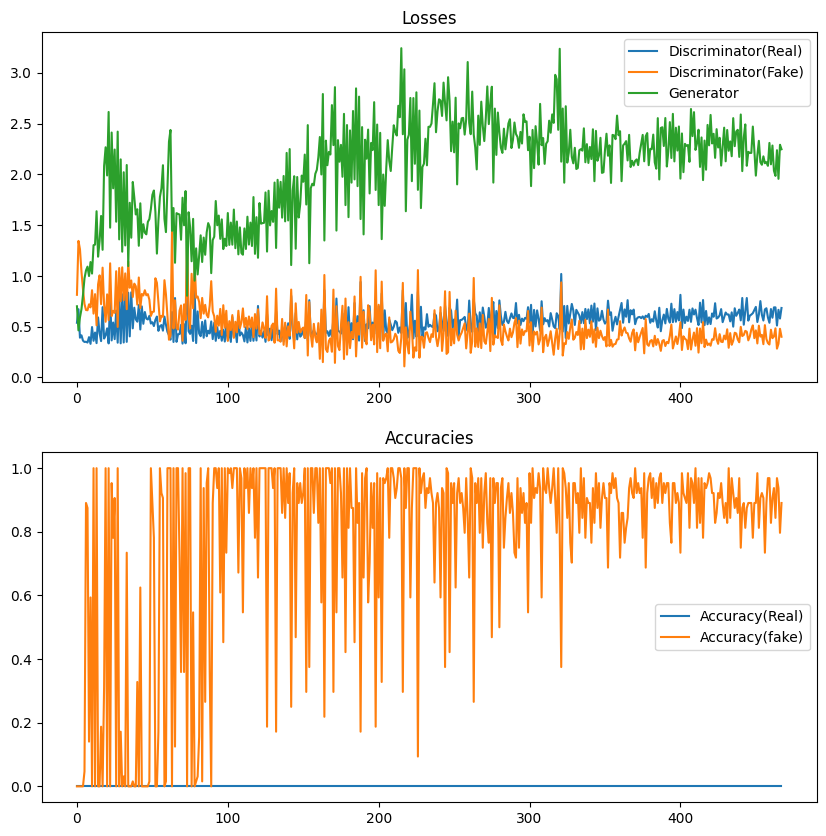

Iteration: 1


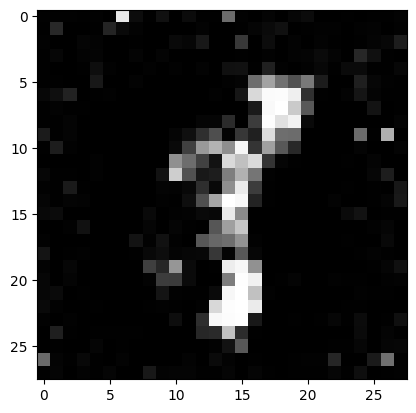

Discriminator prediction: [[0.06005408]] Label: [[7]]


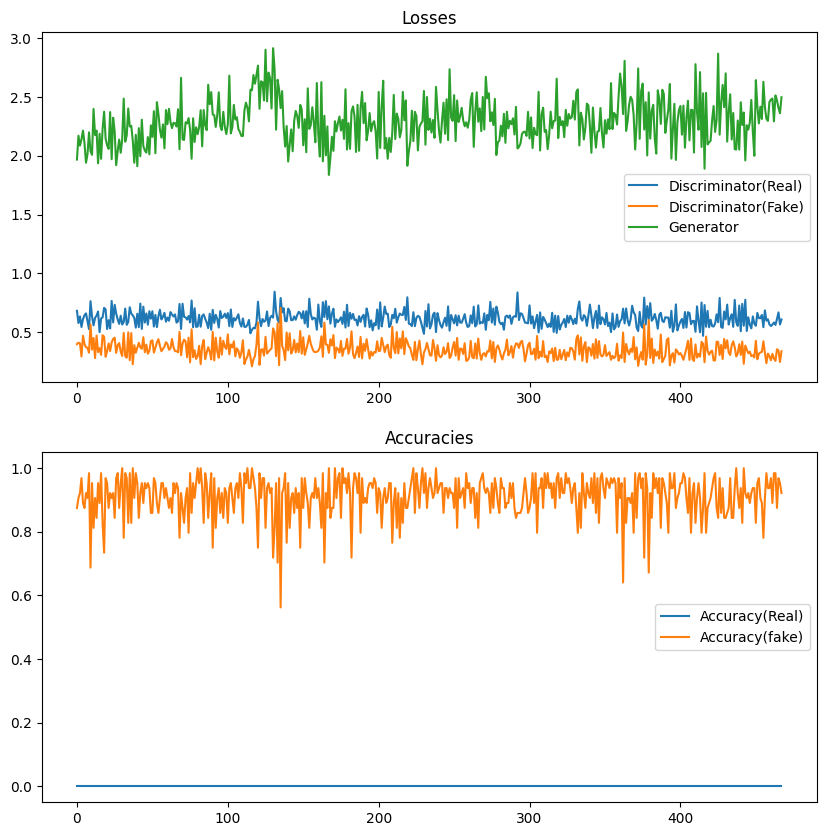

Iteration: 2


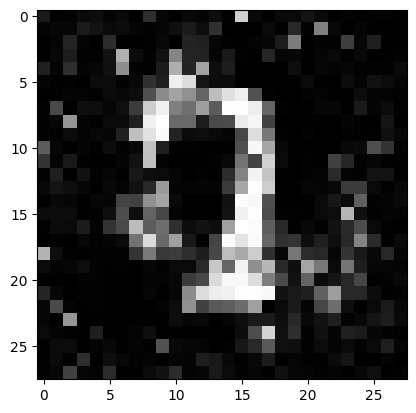

Discriminator prediction: [[0.14115691]] Label: [[7]]


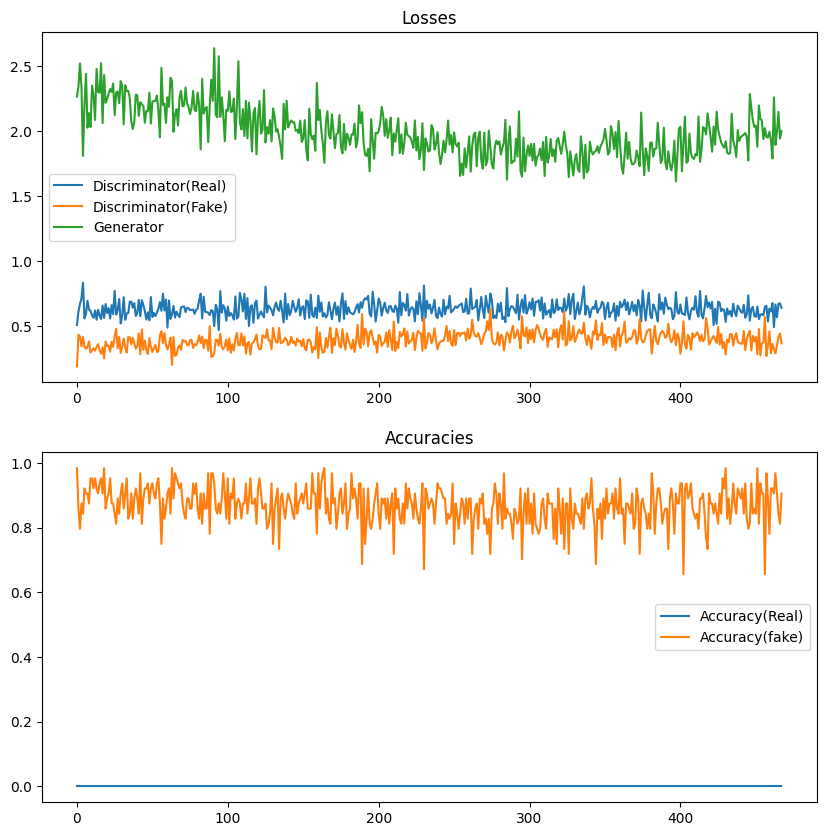

Iteration: 3


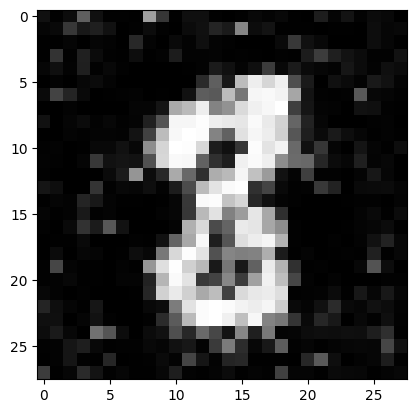

Discriminator prediction: [[0.11387559]] Label: [[9]]


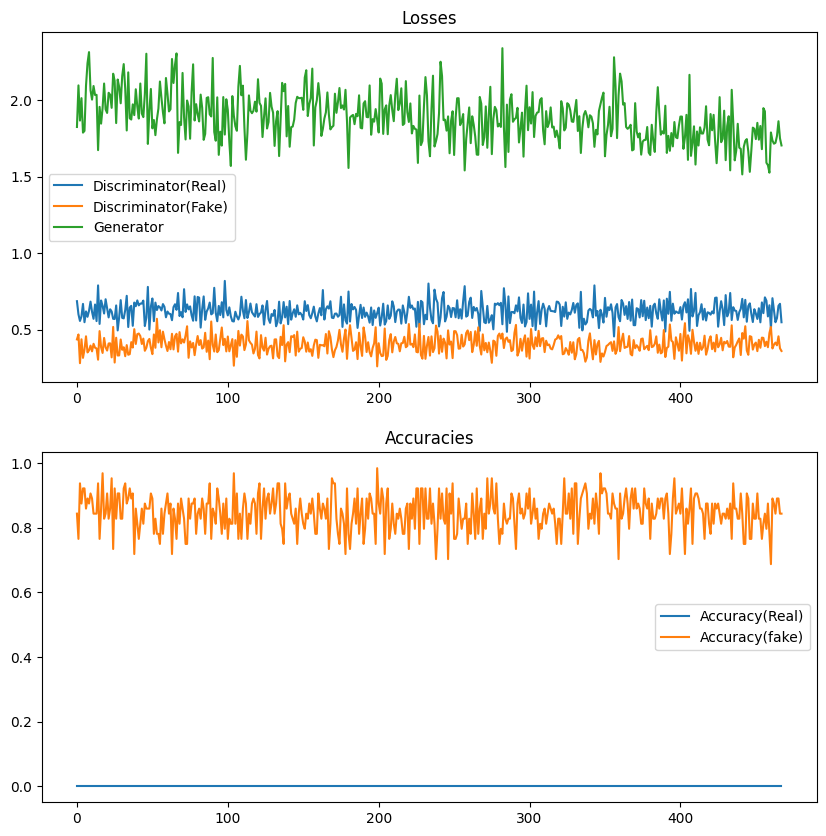

Iteration: 4


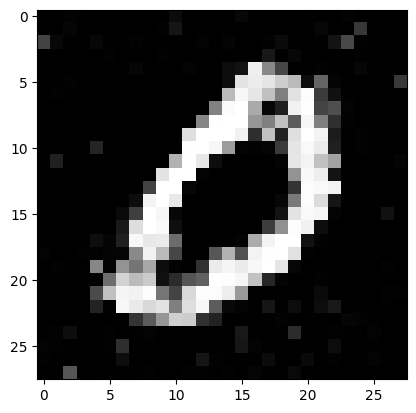

Discriminator prediction: [[0.21424983]] Label: [[0]]


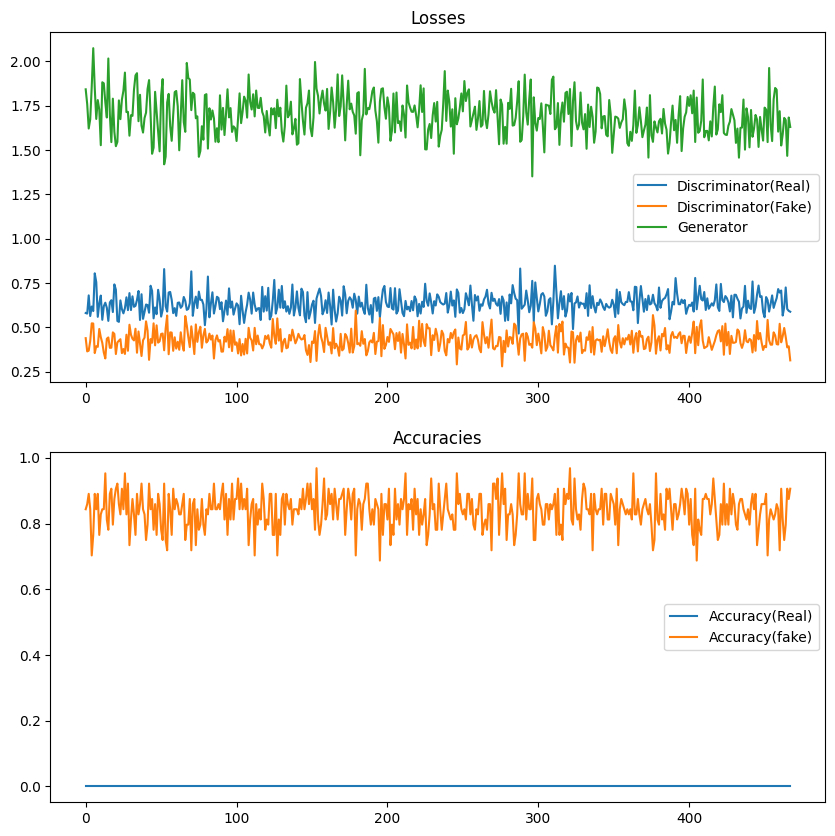

Iteration: 5


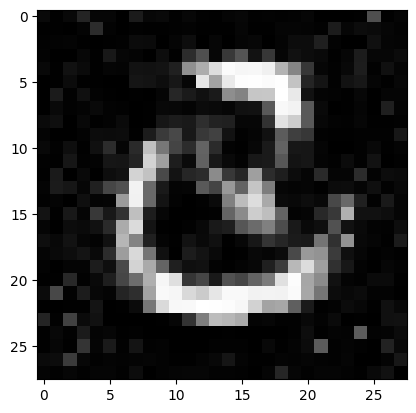

Discriminator prediction: [[0.25812614]] Label: [[5]]


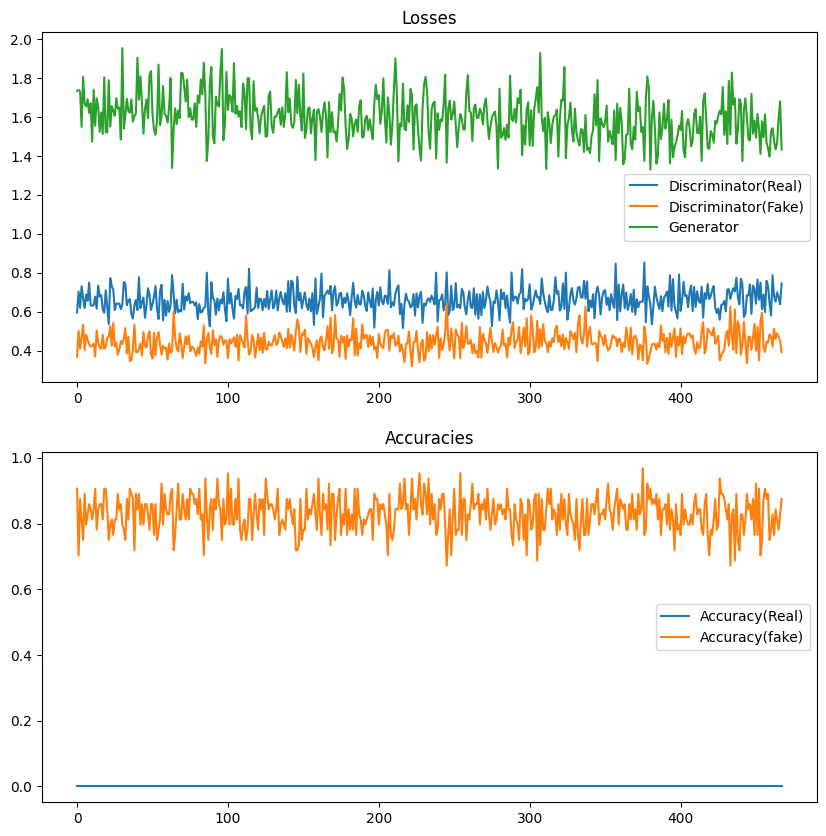

Iteration: 6


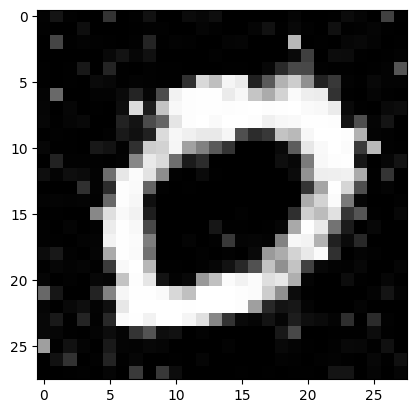

Discriminator prediction: [[0.12832916]] Label: [[0]]


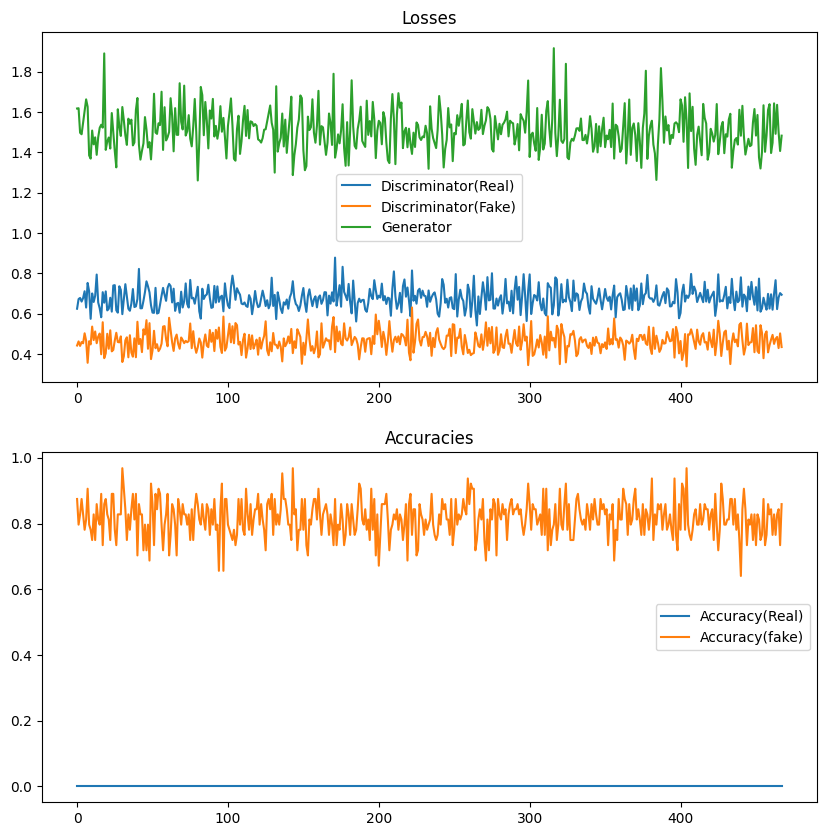

Iteration: 7


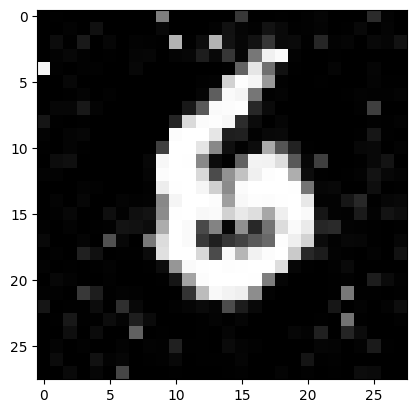

Discriminator prediction: [[0.29239428]] Label: [[6]]


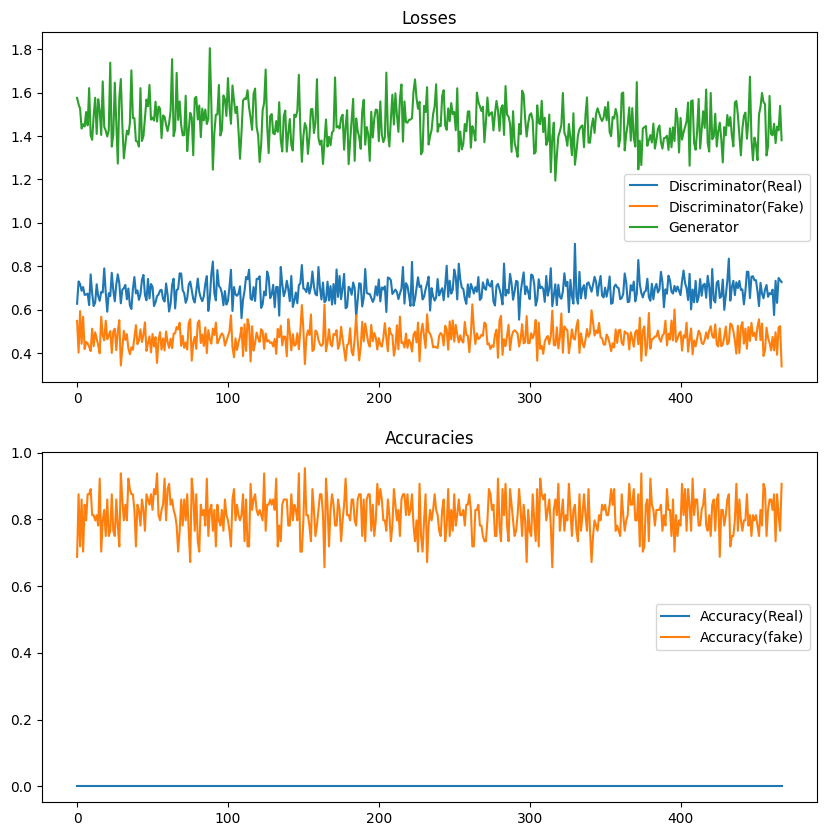

Iteration: 8


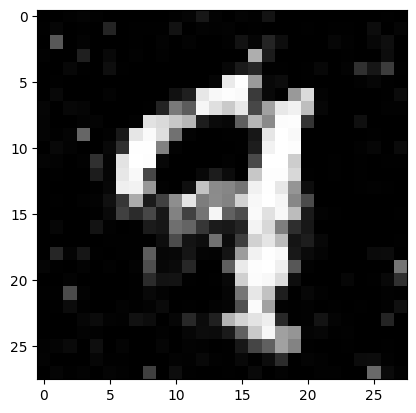

Discriminator prediction: [[0.38944247]] Label: [[9]]


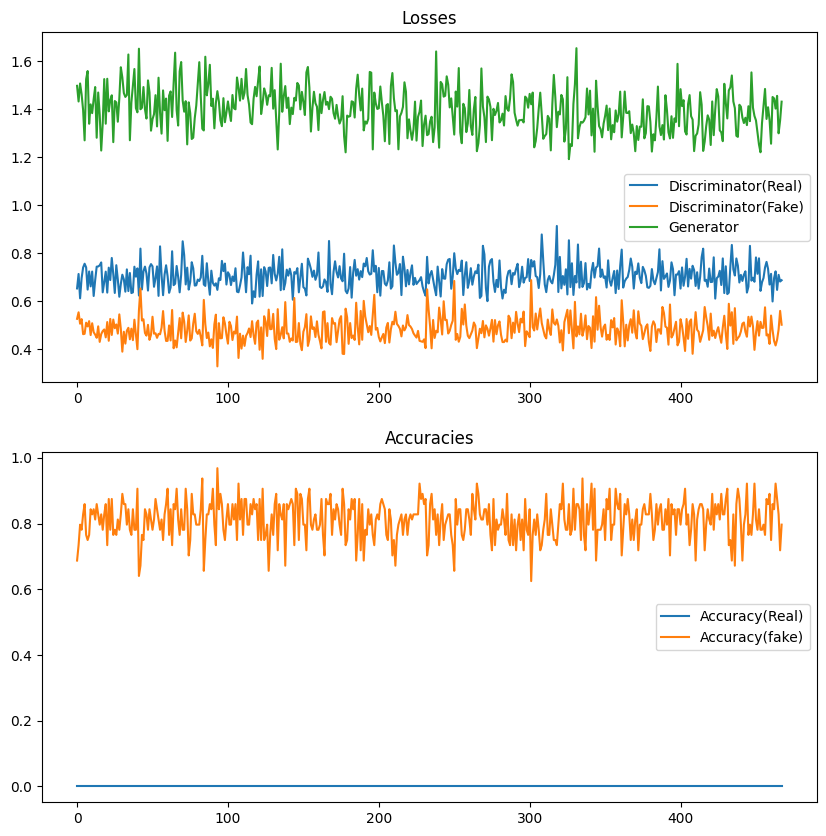

Iteration: 9


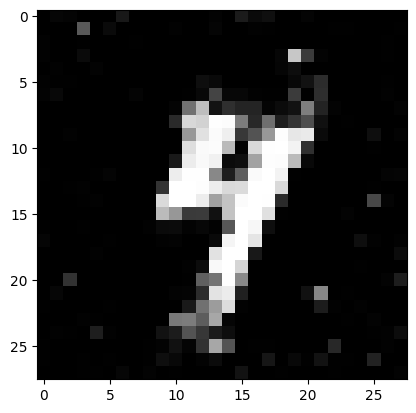

Discriminator prediction: [[0.15757202]] Label: [[4]]


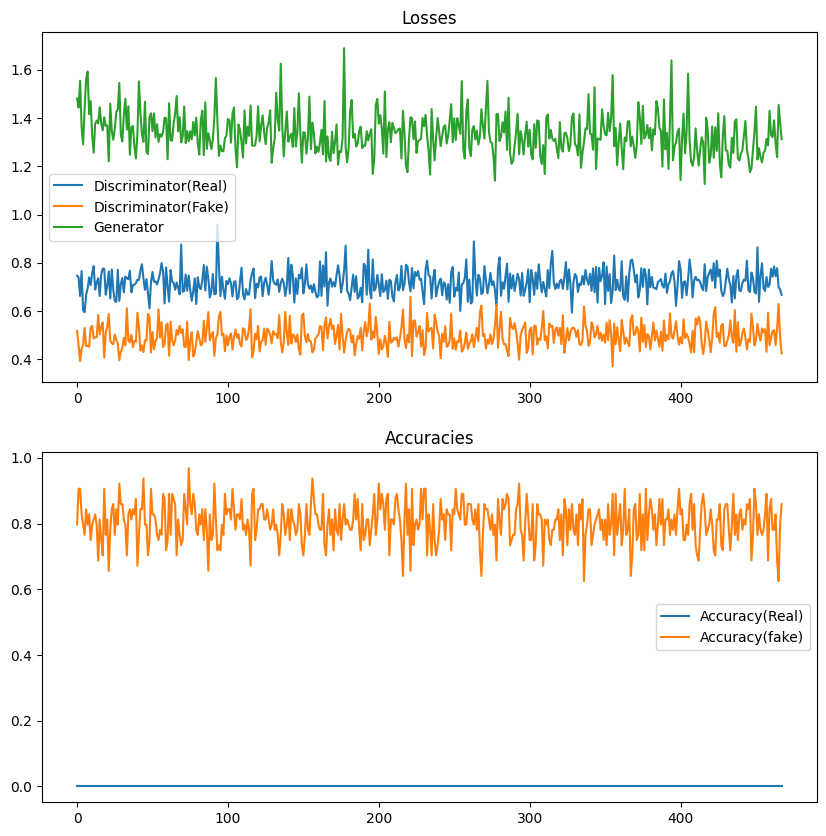

In [13]:

for i in range(num_iterations):
    print("Iteration:", i)
    # Train the discriminator
    
    for k in range(total):
        print(k,"/",total,end="\r")
        idx = np.random.randint(0, train_images.shape[0], batch_size//2)
        real_images = train_images[idx]
        real_labels = train_labels[idx]

        # Generate a batch of fake images
        noise = np.random.normal(0, 1, (batch_size//2, sample_size))
        fake_labels = np.random.randint(0, 10, (batch_size//2, 1))
        fake_images = generator.predict([noise, fake_labels])

        # Train the discriminator
        l1, ac1 = discriminator.train_on_batch([real_images, real_labels], np.ones((batch_size//2, 1)) * (1 - smooth))
        
        l2, ac2 = discriminator.train_on_batch([fake_images, fake_labels], np.zeros((batch_size//2, 1)))

        noise = np.random.normal(0, 1, (batch_size, sample_size))
        fake_labels = np.random.randint(0, 10, (batch_size, 1))
        l3 = gan.train_on_batch([noise, fake_labels], np.ones((batch_size, 1)))
        
        l1_hist.append(l1)
        l2_hist.append(l2)
        l3_hist.append(l3)
        ac1_hist.append(ac1)
        ac2_hist.append(ac2)
        
    # Show plots of the losses and accuracies
    noise = np.random.normal(0, 1, (1, sample_size)) 
    # Pick random label
    label = np.random.randint(0, 10, (1, 1))
    created_img = generator.predict([noise, label])
    plt.imshow(created_img.reshape(28, 28), cmap='gray')
    plt.show()
    pred = discriminator.predict([created_img, label])
    print("Discriminator prediction:", pred, "Label:", label)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(l1_hist, label="Discriminator(Real)")
    plt.plot(l2_hist, label="Discriminator(Fake)")
    plt.plot(l3_hist, label="Generator")
    plt.legend()
    plt.title("Losses")
    plt.subplot(2, 1, 2)
    plt.plot(ac1_hist, label="Accuracy(Real)")
    plt.plot(ac2_hist, label="Accuracy(fake)")
    plt.legend()
    plt.title("Accuracies")
    plt.show()
    l1_hist = []
    l2_hist = []
    l3_hist = []
    ac1_hist = []
    ac2_hist = []
    
    
    
    
    

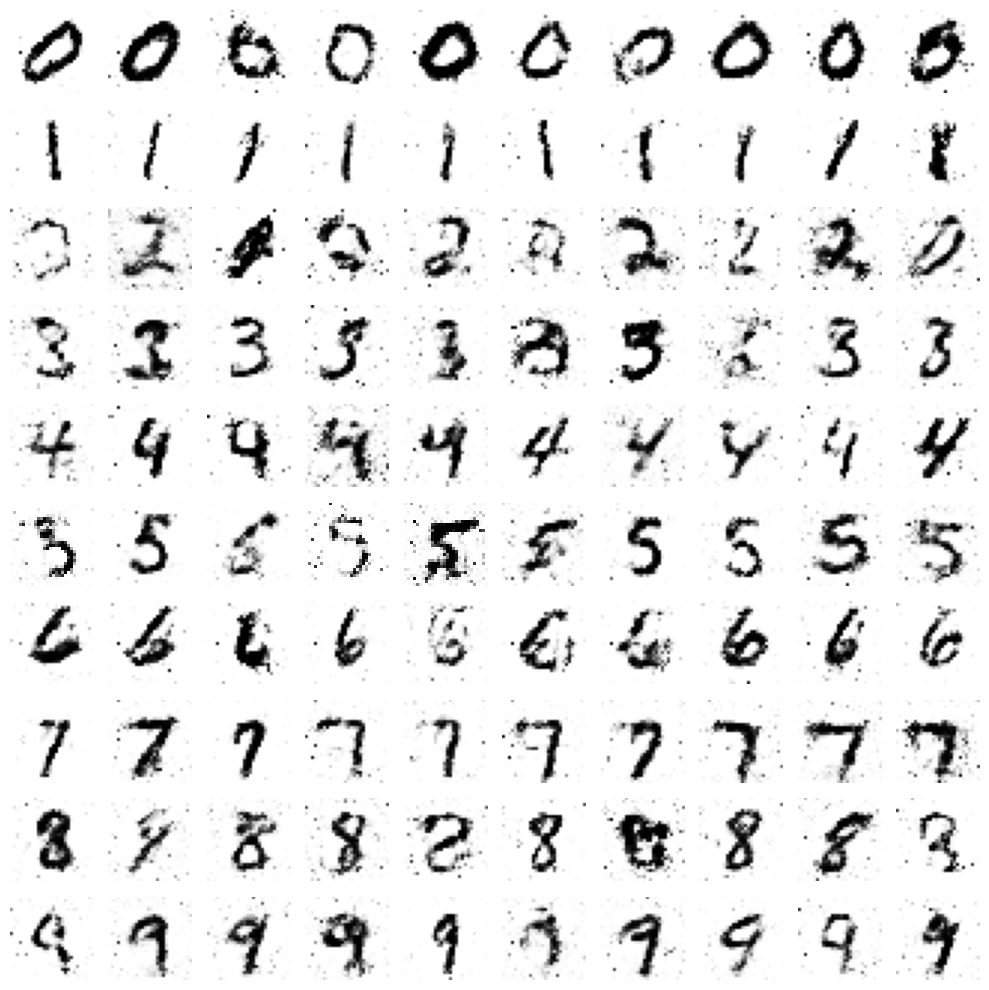

In [14]:
#Show examples of digit where first row is ones, second row is twos, etc.
noise = np.random.normal(0, 1, (100, sample_size))
label = np.arange(10).reshape(-1, 1)
label = np.repeat(label, 10, axis=0)
generated_images = generator.predict([noise, label])
generated_images = (generated_images * 127.5) + 127.5
# # Show the images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray_r')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print((generated_images[1] - 127.5)/127.5)

In [ ]:
plt.imshow(generated_images[0, :, :, 0], cmap='gray_r')

In [ ]:
plt.imshow(train_images[0, :, :, 0], cmap='gray_r')